In [1]:
from network import Network
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Importing and splitting data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
# X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_valid, X_train = X_train_full[:50], X_train_full[50:150]
y_valid, y_train = y_train_full[:50], y_train_full[50:150]

# Normalization
X_train, X_test, X_valid = X_train / 255, X_test / 255, X_valid / 255

# Manual flattening for my custom ann
X_train_flattened = X_train.reshape(X_train.shape[0], 784, 1)
X_test_flattened = X_test.reshape(X_test.shape[0], 784, 1)
X_valid_flattened = X_valid.reshape(X_valid.shape[0], 784, 1)

In [3]:
y_train_encoded = np.zeros((y_train.size, y_train.max()+1))
y_train_encoded[np.arange(y_train.size), y_train] = 1
# y_train_encoded = y_train_encoded.reshape(y_train.shape[0], 10, 1)
y_test_encoded = np.zeros((y_test.size, y_test.max()+1))
y_test_encoded[np.arange(y_test.size), y_test] = 1
y_valid_encoded = np.zeros((y_valid.size, y_valid.max()+1))
y_valid_encoded[np.arange(y_valid.size), y_valid] = 1

In [4]:
net = Network((784, 32, 16, 10))
net.stochastic_gradient_descent((None, "sigmoid", "sigmoid", "sigmoid"), X_train_flattened, y_train_encoded, 2, 10, 0.5, validation_data=(X_valid_flattened, y_valid_encoded))

Epoch 0 -> Training loss: 1.667143262660264, Training accuracy: 0.1, Validation loss: 1.685926857407676, Validation accuracy: 0.12
Epoch 1 -> Training loss: 1.1411240520821806, Training accuracy: 0.12, Validation loss: 1.168558667491048, Validation accuracy: 0.12


In [5]:
net.evaluate(X_test_flattened, y_test_encoded)

Test loss: 1.1769311545932544, Test accuracy: 0.1106


[0.12, 0.12]


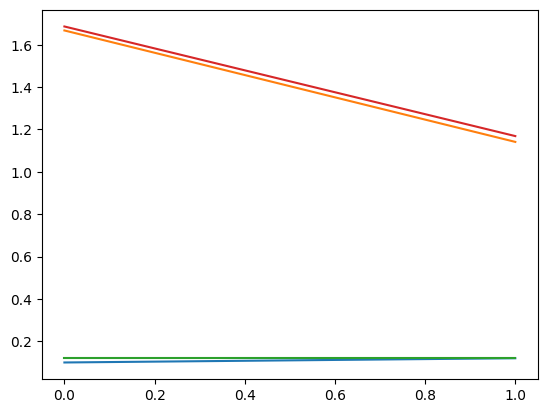

In [6]:
plt.plot(net.history["accuracy"])
plt.plot(net.history["loss"])
plt.plot(net.history["val_accuracy"])
plt.plot(net.history["val_loss"])
print(net.history["val_accuracy"])

In [7]:
print(net.history["val_accuracy"])

[0.12, 0.12]


In [8]:
print(bool(None))

False
